In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image
import pickle

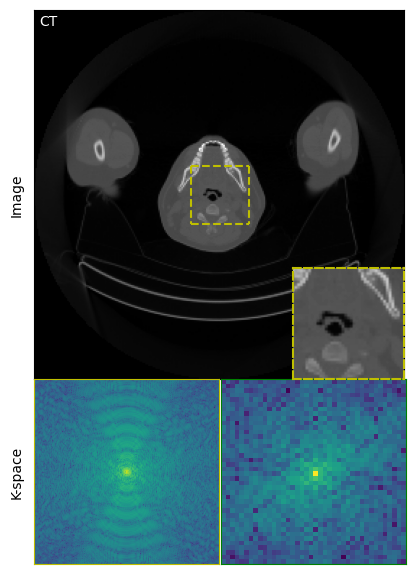

In [2]:
image = np.array(Image.open('/opt/data/private/生成器测试/results/FCT_res_nostr/test_latest/images/petct102450_real_A.png'))
f= np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

x_start, x_end =108,148
y_start, y_end = 108,148

image1=image[x_start: x_end, y_start: y_end ]
f1= np.fft.fft2(image1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20 * np.log(np.abs(fshift1))

fig, axes = plt.subplots()
axes.imshow(image, cmap='gray')
axes.text(3,3,"CT", fontsize=10,verticalalignment='top',color="white")
axes.plot([x_start, x_end], [y_start, y_start], 'y--')  # 顶部虚线
axes.plot([x_start, x_end], [y_end, y_end], 'y--')    # 底部虚线
axes.plot([x_start, x_start], [y_start, y_end], 'y--')  # 左侧虚线
axes.plot([x_end, x_end], [y_start, y_end], 'y--')    # 右侧虚线
axes.set_xticks([])
axes.set_yticks([])
axes.set_ylabel('Image')
axins = inset_axes(axes, width="30%", height="30%",loc='lower right',
				   borderpad=0,
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=axes.transAxes)

axins.imshow(image,"gray")

# 调整子坐标系的显示范围
axins.set_xlim(x_start, x_end)
axins.set_ylim(y_start, y_end)
axins.invert_yaxis()
#mark_inset(axes, axins, loc1=4, loc2=3, fc="none", ec='r', lw=1)

axins.spines[:].set_color('y')
axins.spines[:].set_linewidth(1.5)
axins.spines[:].set_linestyle('--')
#隐藏边框
# axins.spines['right'].set_visible(False)
# axins.spines['top'].set_visible(False)
axins.set_xticks([])
axins.set_yticks([])



extent1 = [0,-0.5,0.5,0.5] #左下角横坐标，左下角纵坐标，宽度占比，高度占比
axins2 = axes.inset_axes(extent1) #在ax1子图中插入子图
axins2.imshow(magnitude_spectrum,cmap = "viridis")
axins2.spines[:].set_color('y')
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set_ylabel('K-space')

extent2 = [0.505,-0.5,0.5,0.5] #左下角横坐标，左下角纵坐标，宽度占比，高度占比
axins3 = axes.inset_axes(extent2) 
axins3.imshow(magnitude_spectrum1,cmap = "viridis")
axins3.spines[:].set_color('g')
axins3.set_xticks([])
axins3.set_yticks([])

plt.show()


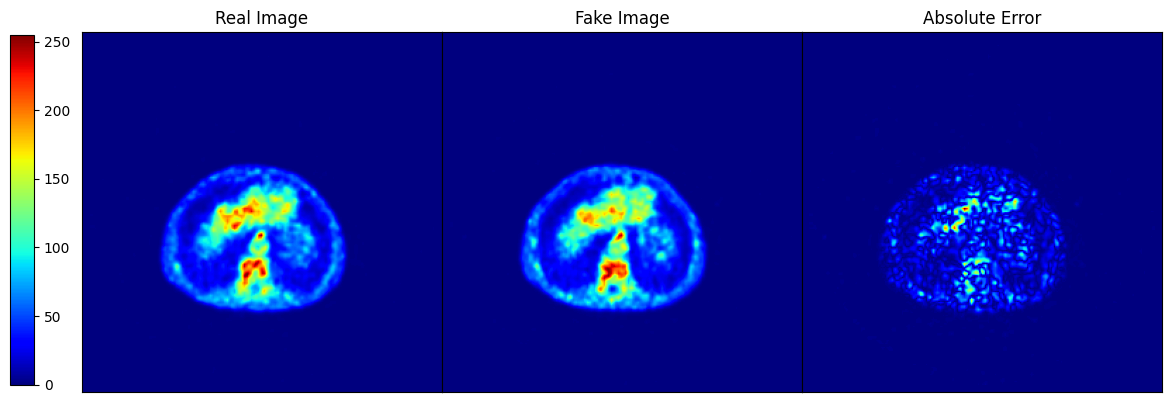

In [3]:
image_real = np.array(Image.open('/opt/data/private/生成器测试/checkpoints/FCT_res/web/images/epoch091_real_B.png'), dtype=np.int16)
image_fake = np.array(Image.open('/opt/data/private/生成器测试/checkpoints/FCT_res/web/images/epoch091_fake_B.png'), dtype=np.int16)
difference =  np.abs(image_fake - image_real )

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

im1 = ax1.imshow(image_real, cmap='jet')
ax1.set_title('Real Image')
ax1.set_xticks([])
ax1.set_yticks([])


im2 = ax2.imshow(image_fake, cmap='jet')
ax2.set_title('Fake Image')
ax2.set_xticks([])
ax2.set_yticks([])
#for spine in ax2.spines.values():
#   spine.set_visible(False)

cbar_ax = fig.add_axes([-0.01, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
fig.colorbar(im1, cax=cbar_ax)



im3 = ax3.imshow(difference, cmap='jet')  #plt.cm.RdBu
ax3.set_title('Absolute Error')
ax3.set_xticks([])
ax3.set_yticks([])
#for spine in ax3.spines.values():
#    spine.set_visible(False)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0)  # 调整子图和色条之间的间距

plt.show()


In [ ]:
with open('/opt/data/private/生成器测试/datasets/petct102/test.pkl', 'rb') as f:
    data_ct = pickle.load(f)
    data_pet = pickle.load(f)
    print(data_ct.shape)
    print(data_pet.shape)

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8, 10))

im1 = ax1.imshow(np.rot90(data_ct[128,:,:]), cmap='gray')
ax1.set_title('Real CT(coronal)')
ax1.set_xticks([])
ax1.set_yticks([])


im2 = ax2.imshow(np.rot90(data_ct[:,128,:]), cmap='gray')
ax2.set_title('Real CT(sagittal)')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axvline(x=128, color='yellow', linestyle='--', linewidth=3)
#for spine in ax2.spines.values():
#   spine.set_visible(False)

im3 = ax3.imshow(np.rot90(data_pet[128,:,:]), cmap='jet')  #plt.cm.RdBu
ax3.set_title('Real PET(coronal)')
ax3.set_xticks([])
ax3.set_yticks([])

im4 = ax4.imshow(np.rot90(data_pet[:,128,:]), cmap='jet')  #plt.cm.RdBu
ax4.set_title('Real PET(sagittal)')
ax4.set_xticks([])
ax4.set_yticks([])
#for spine in ax3.spines.values():
#    spine.set_visible(False)
cbar_ax = fig.add_axes([-0.01, 0.53, 0.02, 0.35]) # [left, bottom, width, height]
fig.colorbar(im1, cax=cbar_ax)
cbar_ax_jet = fig.add_axes([-0.01, 0.11, 0.02, 0.35]) 
fig.colorbar(im3, cax=cbar_ax_jet)  
plt.subplots_adjust(left=0.1, right=0.95, wspace=0)  # 调整子图和色条之间的间距


In [ ]:
plt.plot(data_ct[128,128,:].flatten(), linestyle='--', color='purple',label='CT')
plt.plot(data_pet[128,128,:].flatten(), linestyle='--', color='red',label='PET')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.legend(loc='best')
plt.show()

/tmp/ipykernel_609678/3091755830.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


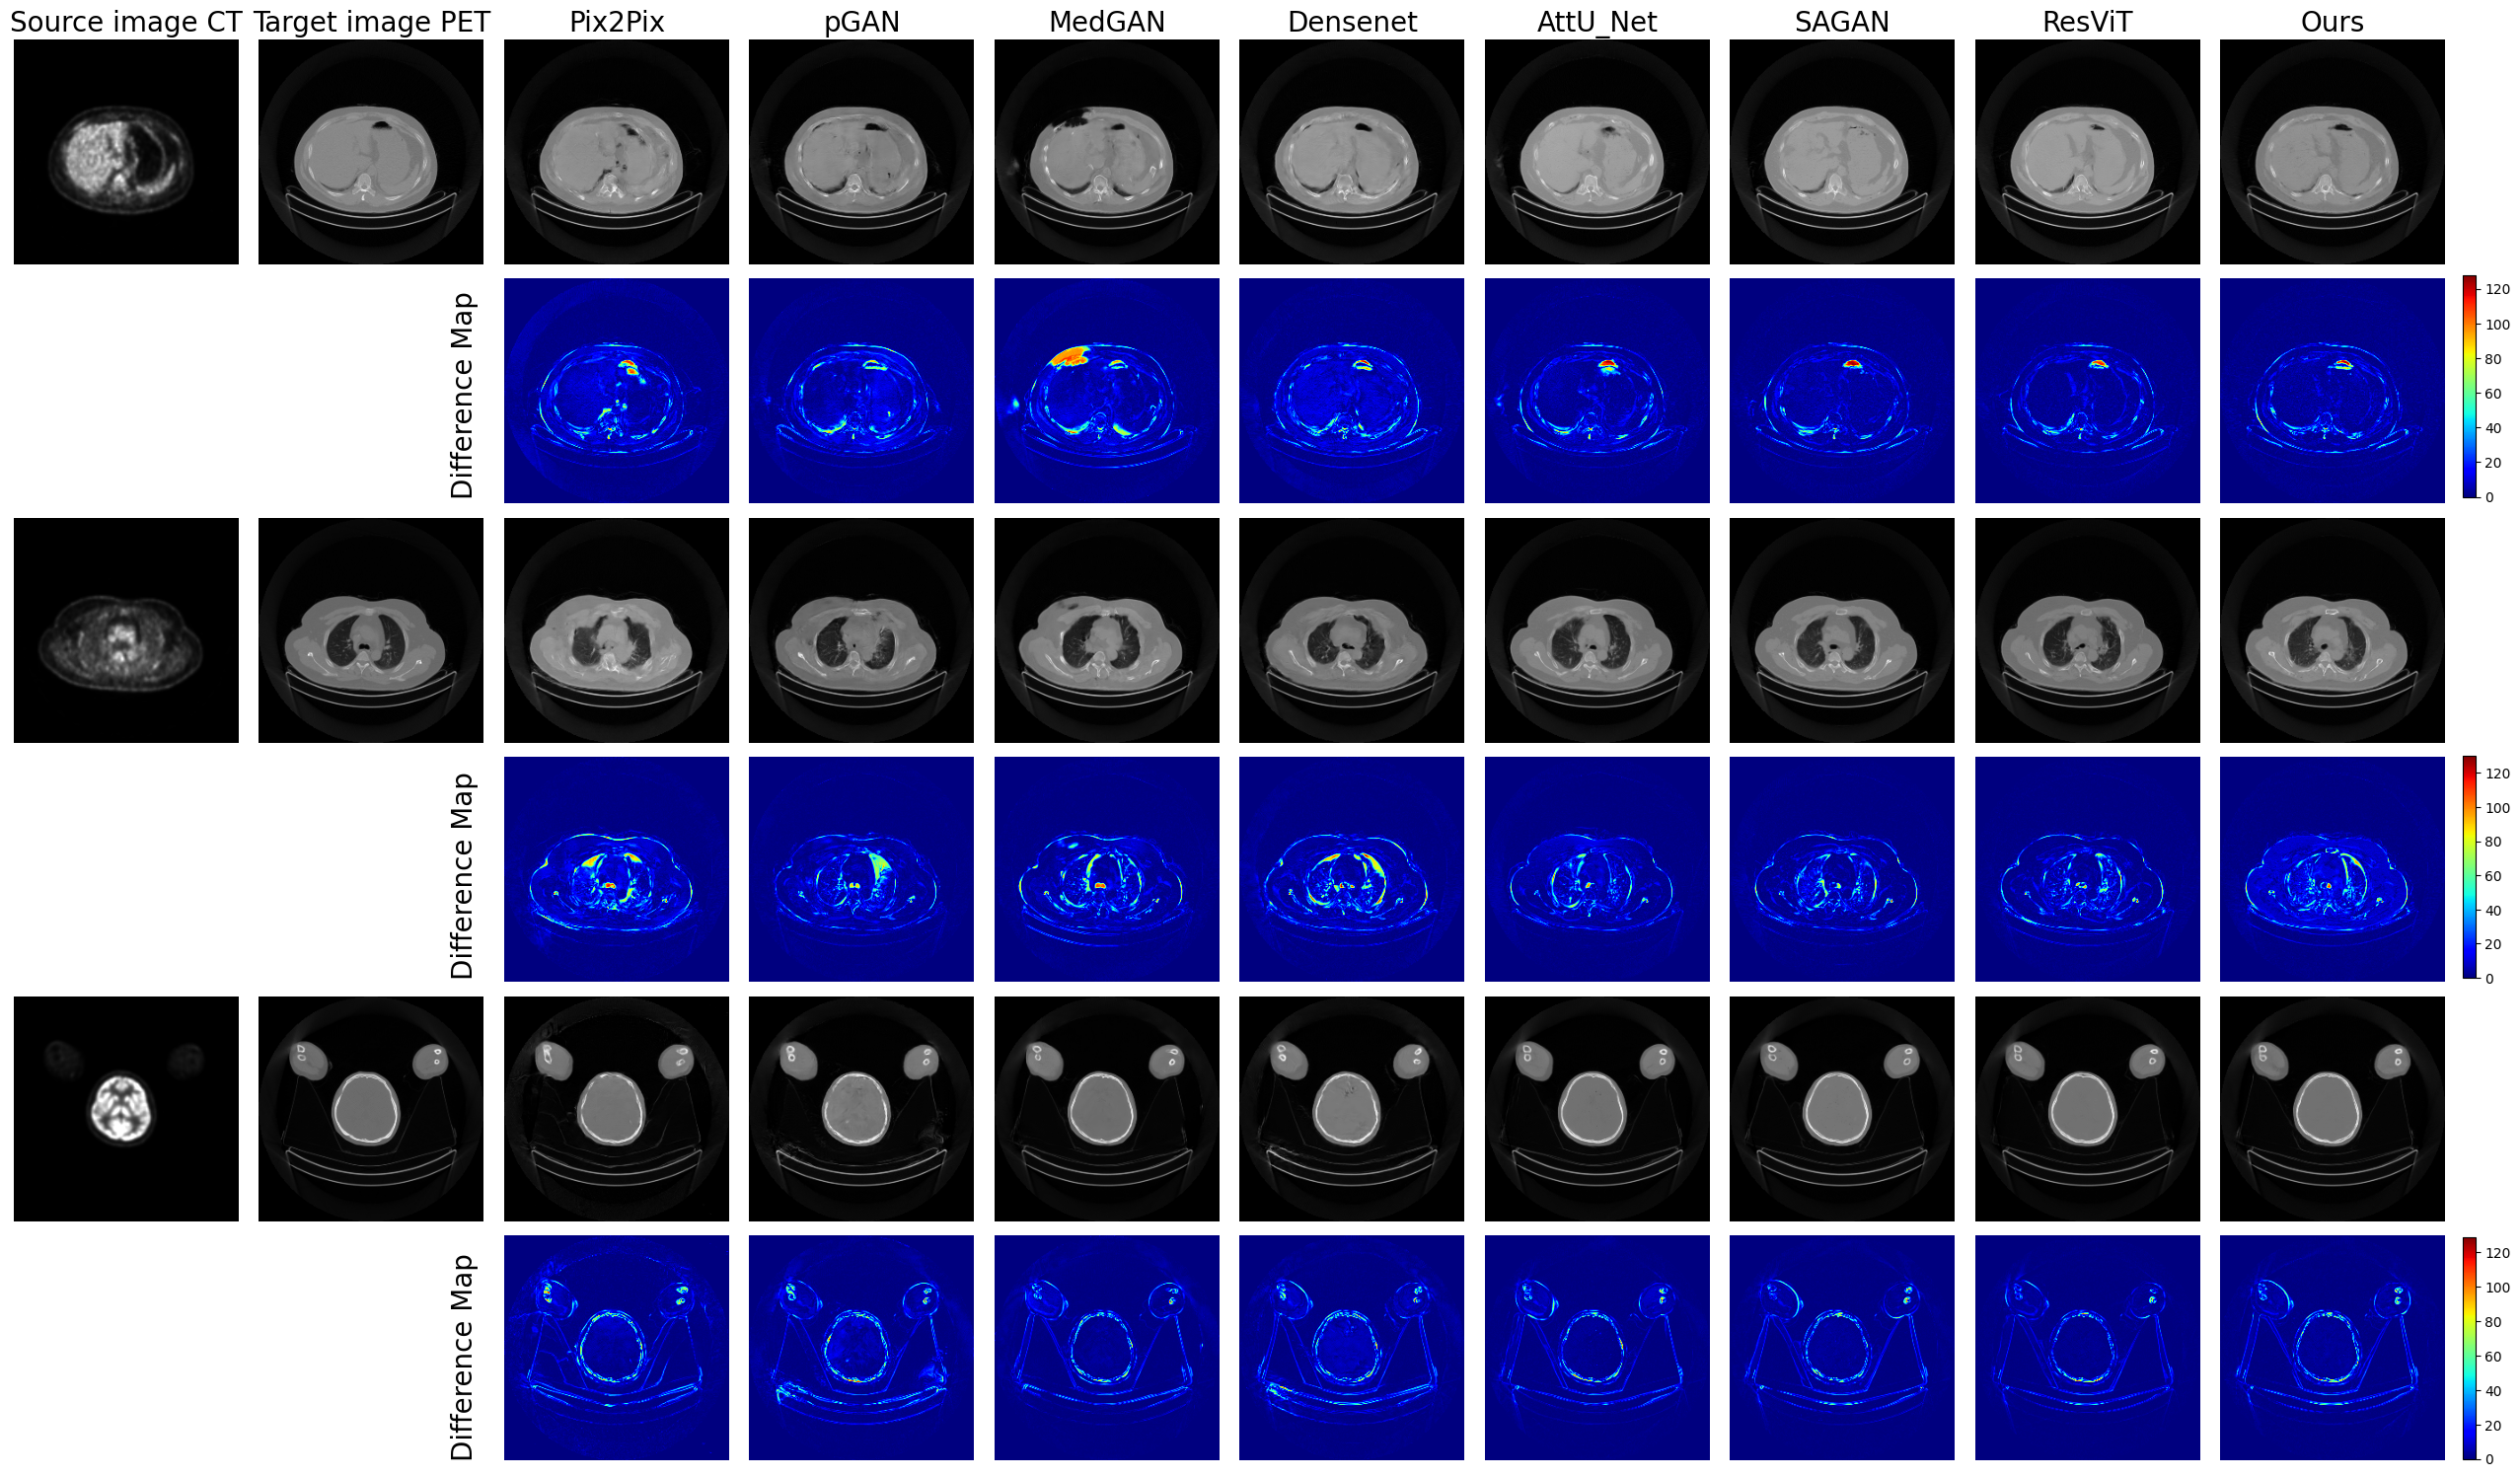

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

fig, axs = plt.subplots(6, 10, figsize=(25, 15))
titles = ['Source image CT', 'Target image PET','Pix2Pix','pGAN', 'MedGAN', 'Densenet', 'AttU_Net', 'SAGAN','ResViT','Ours' ]
for i, title in enumerate(titles):
    axs[0, i].set_title(title, fontsize=20)

# Function to turn off axis for a row
def turn_off_axes(row):
    for ax in row:
        ax.axis('off')

list=[376,411,481]
# Plot the images
for i in range(3):  # We have 3 sets of rows to plot
    ct_image = np.array(Image.open('/opt/data/private/PET生成CT/results/FCT_res_不行/test_latest/images/petct102%d_real_A.png' % list[i]), dtype=np.int16)
    real_pet_image = np.array(Image.open('/opt/data/private/PET生成CT/results/FCT_res_不行/test_latest/images/petct102%d_real_B.png' % list[i]), dtype=np.int16)
    synth_pet_Pix2pix = np.array(Image.open('/opt/data/private/PET生成CT/results/unet_256/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_pGAN = np.array(Image.open('/opt/data/private/PET生成CT/results/resnet_9blocks/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_MedGAN = np.array(Image.open('/opt/data/private/PET生成CT/results/CasUNet/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_Dense = np.array(Image.open('/opt/data/private/PET生成CT/results/desnet_9blocks/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_AttU = np.array(Image.open('/opt/data/private/PET生成CT/results/AttU_Net/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_SAGAN = np.array(Image.open('/opt/data/private/PET生成CT/results/SAUNet/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_ResViT = np.array(Image.open('/opt/data/private/PET生成CT/results/resvit/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)
    synth_pet_Ours = np.array(Image.open('/opt/data/private/PET生成CT/results/FCT_res_不行/test_latest/images/petct102%d_fake_B.png' % list[i]), dtype=np.int16)

    diff_ours = np.abs(real_pet_image - synth_pet_Ours)
    diff_a= np.abs(real_pet_image - synth_pet_Pix2pix)
    diff_b= np.abs(real_pet_image - synth_pet_pGAN)
    diff_c = np.abs(real_pet_image - synth_pet_MedGAN)
    diff_d= np.abs(real_pet_image - synth_pet_Dense)
    diff_e = np.abs(real_pet_image - synth_pet_AttU)
    diff_f = np.abs(real_pet_image - synth_pet_SAGAN)
    diff_g = np.abs(real_pet_image - synth_pet_ResViT)
    

    axs[2*i, 0].imshow(ct_image, cmap='gray')
    axs[2*i, 1].imshow(real_pet_image, cmap='gray')
    axs[2*i, 2].imshow(synth_pet_Pix2pix, cmap='gray')
    axs[2*i, 3].imshow(synth_pet_pGAN, cmap='gray')
    axs[2*i, 4].imshow(synth_pet_MedGAN, cmap='gray')
    axs[2*i, 5].imshow(synth_pet_Dense, cmap='gray')
    axs[2*i, 6].imshow(synth_pet_AttU, cmap='gray')
    axs[2*i, 7].imshow(synth_pet_SAGAN, cmap='gray')
    axs[2*i, 8].imshow(synth_pet_ResViT, cmap='gray')
    axs[2*i, 9].imshow(synth_pet_Ours, cmap='gray')

    axs[2*i+1, 2].imshow(diff_a, cmap='jet')
    axs[2*i+1, 3].imshow(diff_b, cmap='jet')
    axs[2*i+1, 4].imshow(diff_c, cmap='jet')
    axs[2*i+1, 5].imshow(diff_d, cmap='jet')
    axs[2*i+1, 6].imshow(diff_e, cmap='jet')
    axs[2*i+1, 7].imshow(diff_f, cmap='jet')
    axs[2*i+1, 8].imshow(diff_g, cmap='jet')
    img8 = axs[2*i+1, 9].imshow(diff_ours, cmap='jet')
    
    cbar_ax = fig.add_axes([1, 0.661 - 0.325 * i , 0.005, 0.15])
    fig.colorbar(img8, cax=cbar_ax)
    turn_off_axes(axs[2*i+1])
    turn_off_axes(axs[2*i])
    
    fig.text(0.19, (0.73 - 0.325 * i), 'Difference Map', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout()
plt.savefig('/opt/data/private/PET生成CT/pictures/output3.eps')
plt.show()

In [ ]:
ct_image = np.array(Image.open('/opt/data/private/生成器测试/results/ours/test_latest/images/petct102%d_real_A.png' % list[0]), dtype=np.int16)
pet_image = np.array(Image.open('/opt/data/private/生成器测试/results/ours/test_latest/images/petct102%d_real_B.png' % list[0]), dtype=np.int16)
pet_Ours = np.array(Image.open('/opt/data/private/生成器测试/results/ours/test_latest/images/petct102%d_fake_B.png' % list[0]), dtype=np.int16)

plt.plot(ct_image[:,128].flatten(), linestyle='--', color='purple',label='CT')
plt.plot(pet_image[:,128].flatten(), linestyle='--', color='red',label='PET')
plt.plot(pet_Ours[:,128].flatten(), linestyle='--', color='yellow',label='ours')

plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.legend(loc='best')
plt.show()